In [1]:
from importlib import reload
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import nsfg; reload(nsfg)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/thinkstats/utils.py'>

In [2]:
preg = nsfg.ReadFemPreg(prefix="data/")

## 2.1 Histogram

In [3]:
seq = [int(random.random() * 10) for x in range(100)]
hist = {}
for i in seq:
    hist[i] = hist.get(i, 0) + 1
hist

{0: 13, 1: 9, 2: 12, 3: 9, 4: 8, 5: 9, 6: 7, 7: 12, 8: 12, 9: 9}

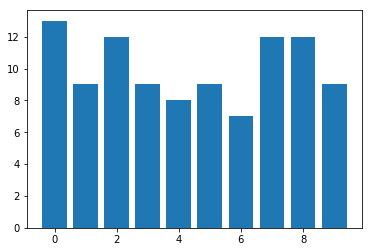

In [4]:
plt.bar(list(hist.keys()), list(hist.values()))
plt.show()

## 2.4 NSFG Variables

In [5]:
live = preg[preg.outcome == 1]

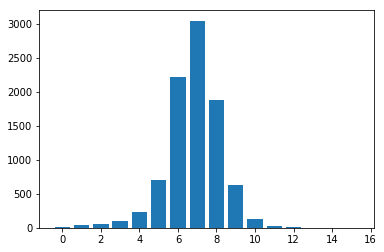

In [6]:
# birthwgt_lb histogram
utils.histogram(live[np.isnan(live.birthwgt_lb) == False].birthwgt_lb)

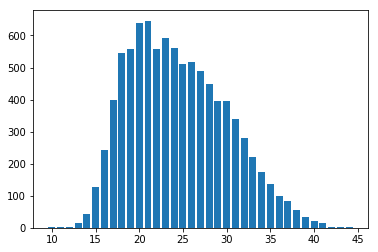

In [7]:
# agepreg histogram
utils.histogram(live[np.isnan(live.agepreg) == False].agepreg)

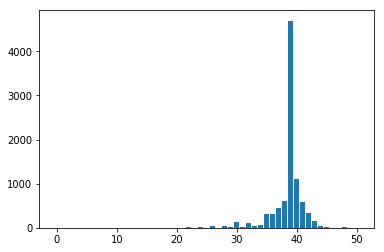

In [8]:
# prglngth histogram
utils.histogram(live[np.isnan(live.prglngth) == False].prglngth)

## 2.5 Outliers

In [9]:
sorted(live.prglngth)[:20]

[0, 4, 9, 13, 17, 17, 18, 19, 20, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 24]

In [10]:
sorted(live.prglngth, reverse=True)[:10]

[50, 50, 48, 48, 48, 48, 48, 48, 48, 47]

## 2.6 First Babies

In [11]:
firsts = live[live.pregordr == 1]
others = live[live.pregordr != 1]

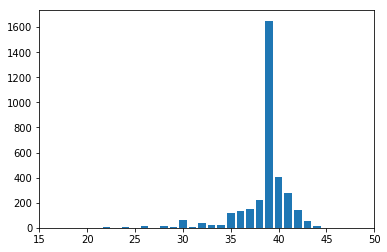

In [12]:
utils.histogram(firsts[np.isnan(firsts.prglngth) == False].prglngth)

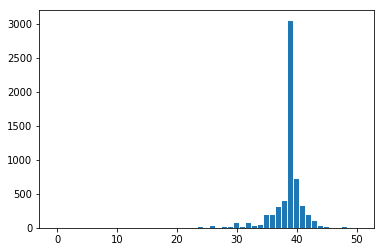

In [13]:
utils.histogram(others[np.isnan(others.prglngth) == False].prglngth)

## 2.8 Variance

In [14]:
mean = live.agepreg.mean()
var = live.agepreg.var()
std = live.agepreg.std()
mean, var, std

(24.940750983821598, 30.995926526811097, 5.5673985421210057)

In [15]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.584323040380049, 38.54671280276817)

## 2.9 Effect size

$d = \cfrac{\bar x_1 - \bar x_2}{s}$, where $s$ is the "pooled standard deviation"

In [16]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (var1 * n1 + var2 * n2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [17]:
firsts2 = firsts[~ np.isnan(firsts.prglngth)]
others2 = others[~ np.isnan(others.prglngth)]
cohen_effect_size(firsts2.prglngth, others2.prglngth)

0.013917193833550412

In [18]:
cohen_effect_size(pd.DataFrame([1,2,3]), pd.DataFrame([2,3,4]))

0   -1.0
dtype: float64

## 2.11 Exercise

In [19]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.2041077339753237, 7.3013998250218721)

In [20]:
cohen_effect_size(firsts.totalwgt_lb, others.totalwgt_lb)

-0.069119360198852314